In [16]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
import time
import scipy

#from common import make_sine_wave, make_silence, bytes_to_arrays, normalized_wf_to_bytes, string_to_binary

import common as c

%matplotlib inline

In [5]:

fn = "signal1.wav"

wf = wave.open(fn, "rb")

data = wf.readframes(wf.getnframes())

sig = c.bytes_to_arrays( data , samplewidth=wf.getsampwidth(), channels=wf.getnchannels() )

fs = wf.getframerate()


In [10]:
sig.shape[0]/fs

59.218375

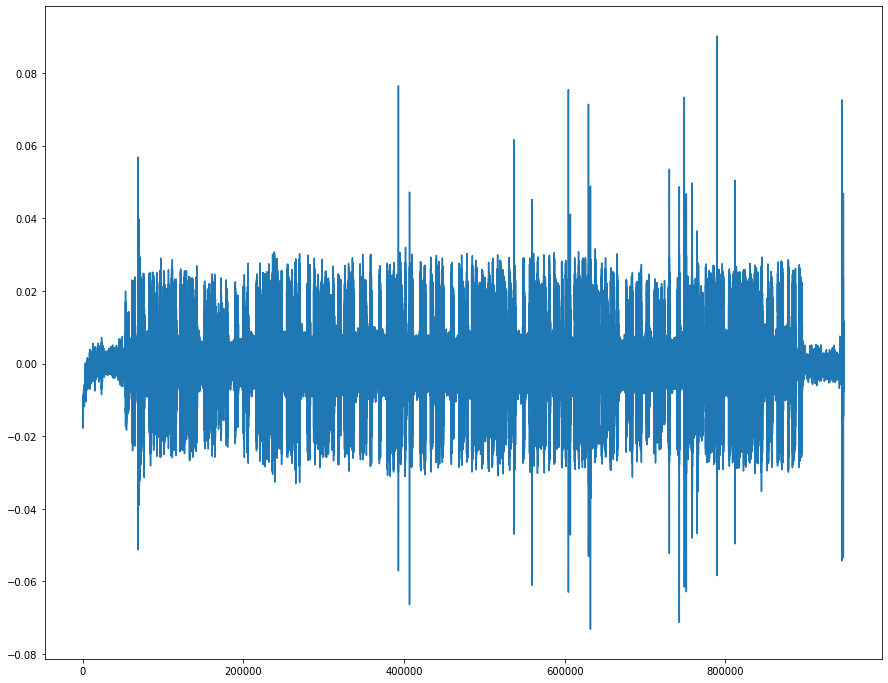

In [12]:
fig = plt.figure( figsize=(15,12))
plt.plot(sig)

In [13]:
# let's start by filter out the 

655.34

0.0625


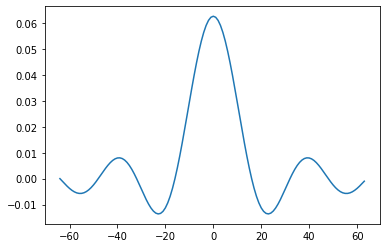

In [139]:
# I'm going to need to do a lot of filtering, let's start with sinc function for a low pass filter

n = np.array( range(-64,64) )

fc = 500  # CT cutoff frequency in hz
W = 2 * np.pi * fc / fs

print(W/np.pi)

h = W * np.sinc(n*W/np.pi)/np.pi

plt.plot( n, h )

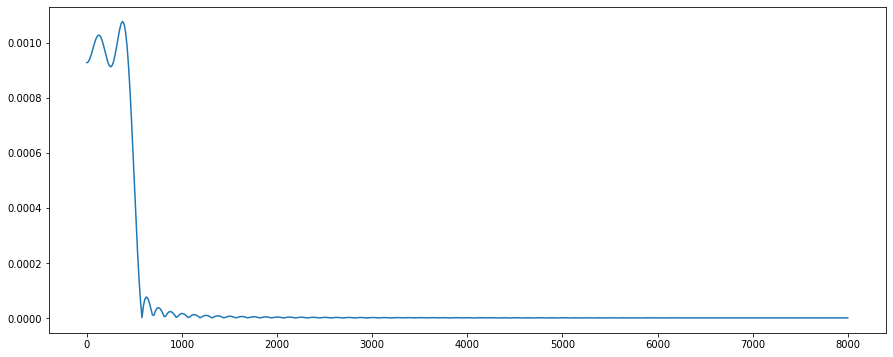

In [140]:
# construct the x axis

#freq = np.linspace(-np.pi,np.pi,1024)
freq = np.linspace(0,1,512)*fs/2

H = np.fft.ifft( h, n=1024 )

#Hs = np.concatenate( [ H[512:], H[0:512] ] )
Hs = H[0:512]

fig = plt.figure( figsize=(15,6) )
plt.plot( freq, np.absolute( Hs ) )


In [116]:
fs

16000

In [47]:
freq

array([-15.6402737 , -46.92082111, -78.20136852, ..., -78.20136852,
       -46.92082111, -15.6402737 ])

In [48]:
rads

array([-3.14159265, -3.13545073, -3.12930881, ...,  3.12930881,
        3.13545073,  3.14159265])

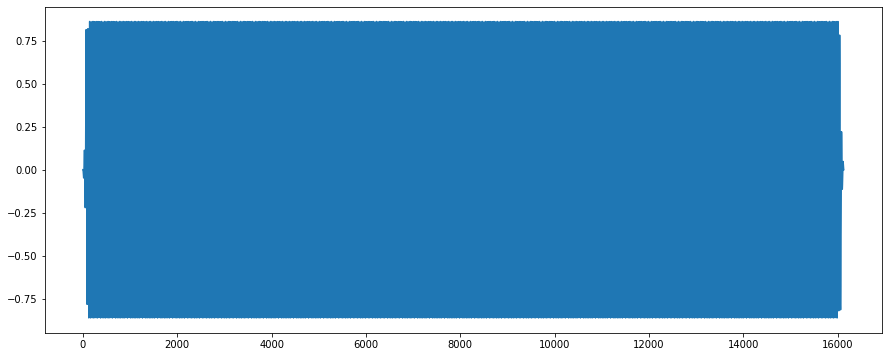

In [142]:

n = np.array( range(0,fs*1) )
f = 450
x = np.sin( 2*np.pi*n*f/fs )

y = np.convolve( x, h )

fig = plt.figure( figsize=(15,6) ) 
plt.plot( y )

In [ ]:
# okay, the filters I need:

h_bp_500hz = 